# Práctica Bases de Datos

## Parte I: SQL Scape Room 
Resuelve el misterio del asesinato en http://mystery.knightlab.com/

## Parte II: Modelo Relacional

La empresa de venta de coches **KARLS** quiere crear un modelo de bases de datos. Para ello, nos ha compartido el fichero `ventas.csv`, que contiene sus ventas más recientes, con los siguientes campos:

*	no_orden: número de la orden
*	codigo_producto: código del producto comprado
*	cantidad_orden: cantidad comprada
*	precio_cada: precio de venta por unidad 
*	nombre_producto: nombre del producto
*	linea_productos: línea de productos
*	descr: descripción de la línea de productos
*	precio_compra: precio de compra de cada producto al proveedor
*	fecha_orden: fecha de la compra
*	no_cliente: número del cliente
*	nombre_cliente: nombre del cliente
*	tlf: teléfono del cliente
*	direccion: dirección del cliente
*	ciudad: ciudad del cliente
*	estado: estado o provincia del cliente
*	codigo_postal: código postal del cliente
*	pais: país del cliente

Por otro lado, KARLS quiere conocer el idioma de cada cliente para poder realizar campañas de marketing personalizadas en diversos idiomas. Para conocer el idioma oficial de cada país, disponemos del acceso a una base de datos con los siguientes parámetros:

*	Servidor: relational.fit.cvut.cz
*	Usuario: guest
*	Contraseña: relational
*	Nombre de la base de datos: world


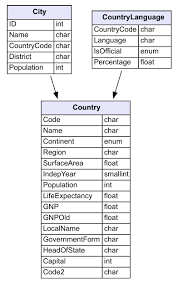

A partir del fichero `ventas.csv` diseña un modelo de base de datos relacional, almacénalo en una base de datos SQLite y crea una tabla en la que se asocie cada cliente con su idioma.

1) Diseña el diagrama de la base de datos. Puedes elegir el nombre que prefieras para cada una de las tablas. Utiliza cualquier programa de edición de imágenes o la herramienta web https://dbdiagram.io/d  
2) Crea una base de datos llamada karls.sqlite que contenga las tablas del modelo relacional con los datos correspondientes.  
3) Accede a la base de datos world y construye la tabla que relacione cada cliente con su idioma. Añade esta tabla a la base de datos del paso anterior con el nombre de idiomas_cliente  

¿Cuál es el producto que aporta más beneficios?

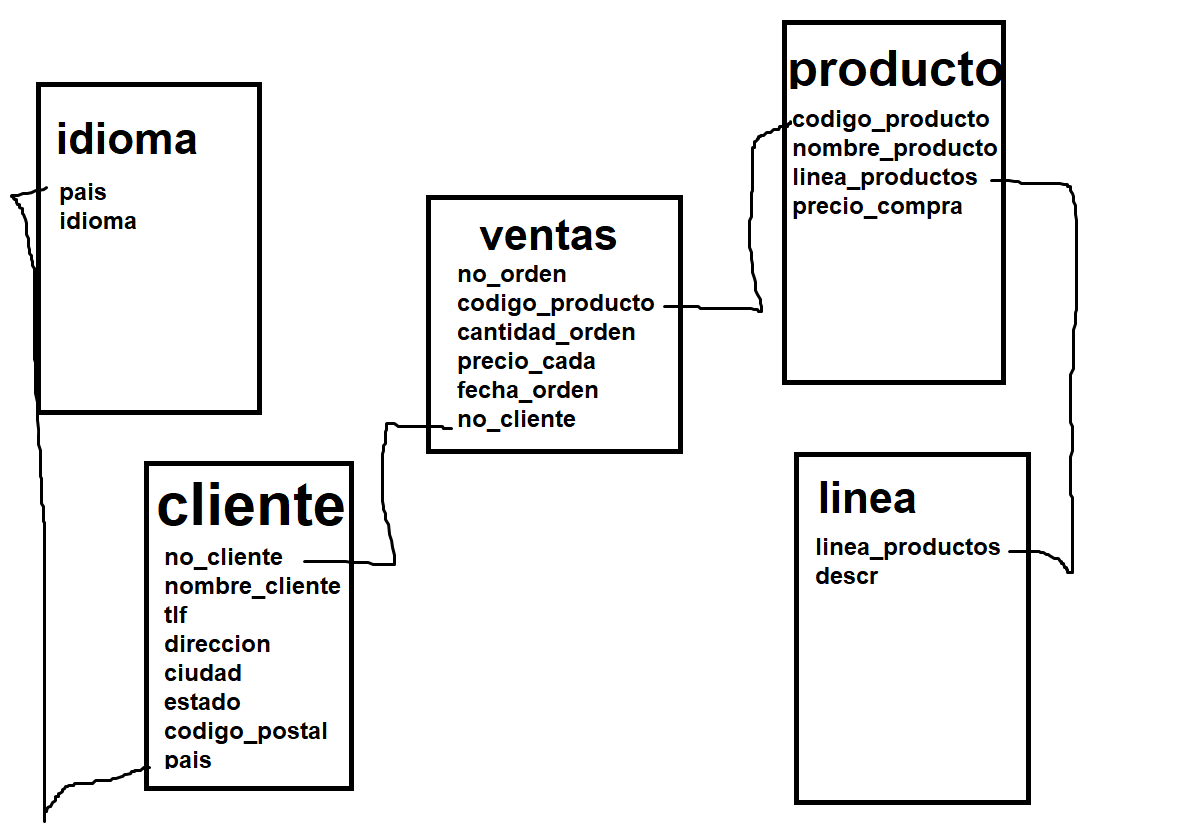

In [1]:
import pandas as pd
import sqlite3
import pymysql

In [2]:
datos = pd.read_csv('ventas.csv')
datos

,no_orden,codigo_producto,cantidad_orden,precio_cada,nombre_producto,linea_productos,descr,precio_compra,fecha_orden,no_cliente,nombre_cliente,tlf,direccion,ciudad,estado,codigo_postal,pais
0,10100,S18_1749,30,136.00,1917 Grand Touring Sedan,Vintage Cars,Our Vintage Car models realistically portray a...,86.70,2003-01-06,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
1,10100,S18_2248,50,55.09,1911 Ford Town Car,Vintage Cars,Our Vintage Car models realistically portray a...,33.30,2003-01-06,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
2,10100,S18_4409,22,75.46,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,Our Vintage Car models realistically portray a...,43.26,2003-01-06,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
3,10100,S24_3969,49,35.29,1936 Mercedes Benz 500k Roadster,Vintage Cars,Our Vintage Car models realistically portray a...,21.75,2003-01-06,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
4,10101,S18_2325,25,108.06,1932 Model A Ford J-Coupe,Vintage Cars,Our Vintage Car models realistically portray a...,58.48,2003-01-09,128,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,10425,S24_2300,49,127.79,1962 Volkswagen Microbus,Trucks and Buses,The Truck and Bus models are realistic replica...,61.34,2005-05-31,119,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France
2992,10425,S24_2840,31,31.82,1958 Chevy Corvette Limited Edition,Classic Cars,Attention car enthusiasts: Make your wildest c...,15.91,2005-05-31,119,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France
2993,10425,S32_1268,41,83.79,1980’s GM Manhattan Express,Trucks and Buses,The Truck and Bus models are realistic replica...,53.93,2005-05-31,119,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France
2994,10425,S32_2509,11,50.32,1954 Greyhound Scenicruiser,Trucks and Buses,The Truck and Bus models are realistic replica...,25.98,2005-05-31,119,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France


In [4]:
# DIMENSIÓN CLIENTE
cols = ['no_cliente', 'nombre_cliente', 'tlf', 'direccion', 'ciudad', 'estado', 'codigo_postal','pais']
cliente = datos[cols]
cliente.drop_duplicates(inplace=True)
cliente

C:\Users\rzambrano\AppData\Local\Temp\ipykernel_18292\2912156160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente.drop_duplicates(inplace=True)


,no_cliente,nombre_cliente,tlf,direccion,ciudad,estado,codigo_postal,pais
0,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
4,128,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany
8,181,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,NY,10022,USA
10,121,Baane Mini Imports,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway
26,141,Euro+ Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain
...,...,...,...,...,...,...,...,...
1619,204,Online Mini Collectables,6175557555,7635 Spinnaker Dr.,Brickhaven,MA,58339,USA
1650,249,Amica Models & Co.,011-4988555,Via Monte Bianco 34,Torino,NaN,10100,Italy
1708,299,"NorwayGifts By Mail, Co.",+47 2212 1555,Drammensveien 126A,Oslo,NaN,N 0106,Norway
1721,286,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,Cambridge,MA,51247,USA


In [5]:
# Dimensión PRODUCTOS
cols = ['codigo_producto', 'nombre_producto','linea_productos','precio_compra']
producto = datos[cols].drop_duplicates()
producto

,codigo_producto,nombre_producto,linea_productos,precio_compra
0,S18_1749,1917 Grand Touring Sedan,Vintage Cars,86.70
1,S18_2248,1911 Ford Town Car,Vintage Cars,33.30
2,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,43.26
3,S24_3969,1936 Mercedes Benz 500k Roadster,Vintage Cars,21.75
4,S18_2325,1932 Model A Ford J-Coupe,Vintage Cars,58.48
...,...,...,...,...
110,S24_1628,1966 Shelby Cobra 427 S/C,Classic Cars,29.18
113,S24_2766,1949 Jaguar XK 120,Classic Cars,47.25
114,S24_2887,1952 Citroen-15CV,Classic Cars,72.82
115,S24_3191,1969 Chevrolet Camaro Z28,Classic Cars,50.51


In [6]:
# Dimensión LÍNEA DE PRODUCTOS
linea = datos[['linea_productos','descr']].drop_duplicates()
linea

,linea_productos,descr
0,Vintage Cars,Our Vintage Car models realistically portray a...
10,Classic Cars,Attention car enthusiasts: Make your wildest c...
12,Trucks and Buses,The Truck and Bus models are realistic replica...
36,Trains,Model trains are a rewarding hobby for enthusi...
45,Ships,The perfect holiday or anniversary gift for ex...
54,Planes,"Unique, diecast airplane and helicopter replic..."
72,Motorcycles,Our motorcycles are state of the art replicas ...


In [7]:
# TABLA DE HECHOS: VENTAS
cols = ['no_orden', 'codigo_producto', 'cantidad_orden', 'precio_cada', 'fecha_orden','no_cliente']
ventas = datos[cols].drop_duplicates()
ventas

,no_orden,codigo_producto,cantidad_orden,precio_cada,fecha_orden,no_cliente
0,10100,S18_1749,30,136.00,2003-01-06,363
1,10100,S18_2248,50,55.09,2003-01-06,363
2,10100,S18_4409,22,75.46,2003-01-06,363
3,10100,S24_3969,49,35.29,2003-01-06,363
4,10101,S18_2325,25,108.06,2003-01-09,128
...,...,...,...,...,...,...
2991,10425,S24_2300,49,127.79,2005-05-31,119
2992,10425,S24_2840,31,31.82,2005-05-31,119
2993,10425,S32_1268,41,83.79,2005-05-31,119
2994,10425,S32_2509,11,50.32,2005-05-31,119


In [8]:
conn = sqlite3.connect('karls.sqlite')

In [9]:
cliente.to_sql('CLIENTE',conn,index=False,if_exists='replace')

98

In [10]:
pd.read_sql('SELECT * FROM CLIENTE',conn)

,no_cliente,nombre_cliente,tlf,direccion,ciudad,estado,codigo_postal,pais
0,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
1,128,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,None,60528,Germany
2,181,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,NY,10022,USA
3,121,Baane Mini Imports,07-98 9555,Erling Skakkes gate 78,Stavern,None,4110,Norway
4,141,Euro+ Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,None,28034,Spain
...,...,...,...,...,...,...,...,...
93,204,Online Mini Collectables,6175557555,7635 Spinnaker Dr.,Brickhaven,MA,58339,USA
94,249,Amica Models & Co.,011-4988555,Via Monte Bianco 34,Torino,None,10100,Italy
95,299,"NorwayGifts By Mail, Co.",+47 2212 1555,Drammensveien 126A,Oslo,None,N 0106,Norway
96,286,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,Cambridge,MA,51247,USA


In [11]:
producto.to_sql('PRODUCTO',conn,index=False,if_exists='replace')

109

In [12]:
ventas.to_sql('VENTAS',conn,index=False,if_exists='replace')

2996

In [13]:
linea.to_sql('LINEA',conn,index=False,if_exists='replace')

7

Nos conectamos a la base de datos world y añadimos la tabla que relacione cada cliente con su idioma

In [15]:
database_host = 'relational.fit.cvut.cz'
username = 'guest'
password = 'relational'
database_name = 'world'

db = pymysql.connect(host=database_host,
                     user=username,
                     password=password,
                     database=database_name)


In [17]:
import warnings
warnings.filterwarnings('ignore')

pd.read_sql('SHOW TABLES',db)

,Tables_in_world
0,City
1,Country
2,CountryLanguage


In [19]:
pd.read_sql('SELECT * FROM Country',db)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [18]:
pd.read_sql('SELECT * FROM CountryLanguage', db)

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
...,...,...,...,...
979,ZMB,Tongan,F,11.0
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2


In [23]:
# Query para saber el idioma más hablado de cada país
query = '''
SELECT Name, Language, IsOfficial, Percentage
FROM CountryLanguage
JOIN Country
ON CountryLanguage.CountryCode = Country.Code
WHERE Percentage = (SELECT MAX(Percentage)
                    FROM CountryLanguage
                    WHERE Country.Code = CountryLanguage.CountryCode
                    )
'''

idiomas = pd.read_sql(query,db)
idiomas

,Name,Language,IsOfficial,Percentage
0,Aruba,Papiamento,F,76.7
1,Afghanistan,Pashto,T,52.4
2,Angola,Ovimbundu,F,37.2
3,Anguilla,English,T,0.0
4,Albania,Albaniana,T,97.9
...,...,...,...,...
236,Yemen,Arabic,T,99.6
237,Yugoslavia,Serbo-Croatian,T,75.2
238,South Africa,Zulu,T,22.7
239,Zambia,Bemba,F,29.7


In [25]:
idiomas.to_sql('IDIOMA',conn,index=False,if_exists='replace')

241

In [26]:
pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"',conn)

,name
0,CLIENTE
1,PRODUCTO
2,VENTAS
3,LINEA
4,IDIOMA


In [29]:
# Relacionar a cada cliente con su idioma
query = '''
SELECT no_cliente,pais,Language
FROM CLIENTE
LEFT JOIN IDIOMA
ON CLIENTE.pais = IDIOMA.Name
WHERE Language IS NULL
'''
pd.read_sql(query,conn)

,no_cliente,pais,Language
0,363,USA,None
1,181,USA,None
2,131,USA,None
3,486,USA,None
4,187,UK,None
5,129,USA,None
6,124,USA,None
7,424,USA,None
8,112,USA,None
9,151,USA,None


In [31]:
# Observamos que hay clientes (de USA y UK) que no tienen idioma asociado. Comprobamos que se debe a que en la base de datos
# world, los nombres de estos países no coinciden

query= '''
SELECT * 
FROM IDIOMA
WHERE Name LIKE '%United%'
'''

pd.read_sql(query, conn)

,Name,Language,IsOfficial,Percentage
0,United Arab Emirates,Arabic,T,42.0
1,United Kingdom,English,T,97.3
2,United States Minor Outlying Islands,English,T,0.0
3,United States,English,T,86.2
